2023-05-30 07:52:31.344942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.654e-01|  1.514e-01|           19840|     6.989e-02|     3.598e-02|               4716|   2.052e-02|   1.054e-02|          

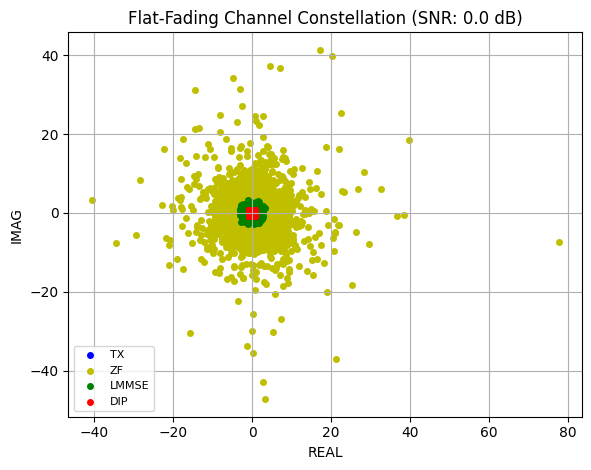

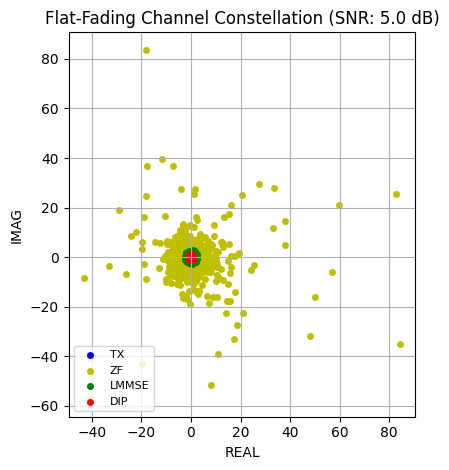

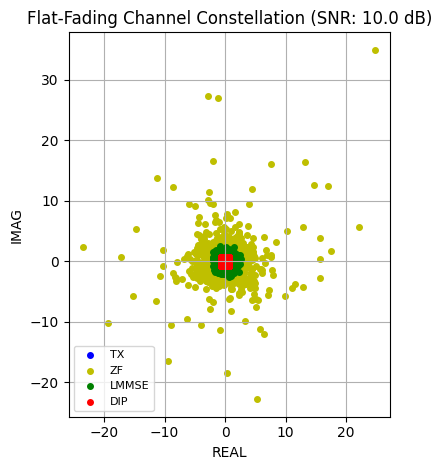

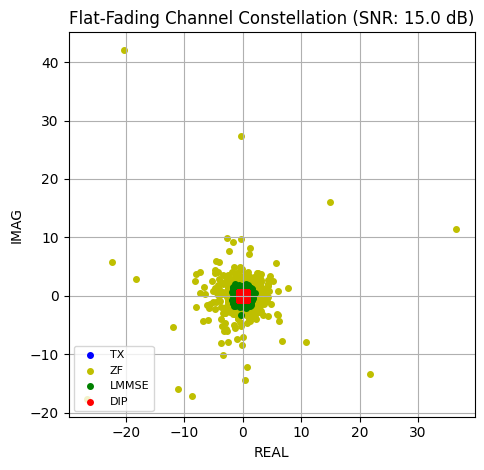

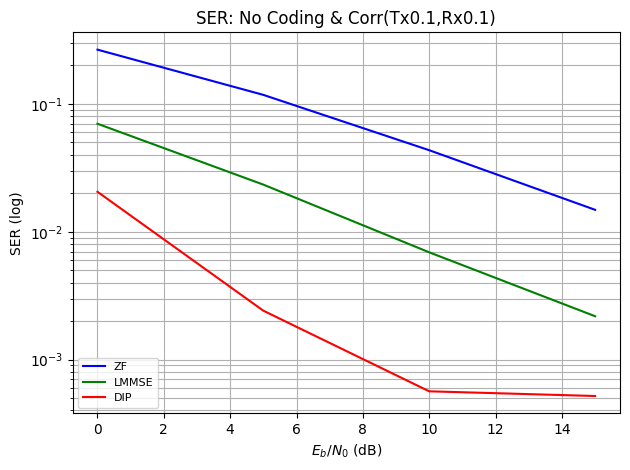

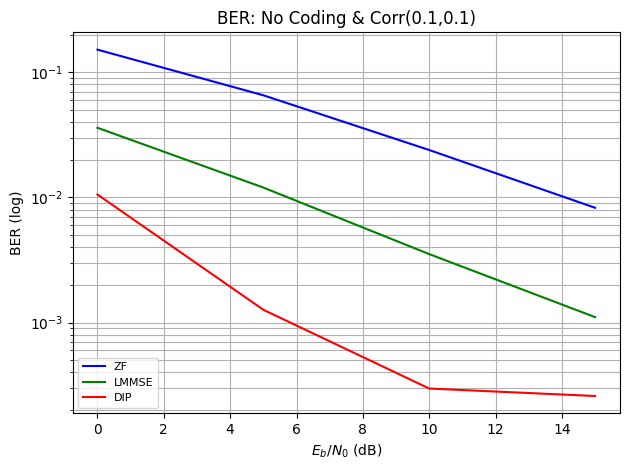

|                                                         TX_ANT_CORRELATION: 0.1 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  5.492e-01|  3.338e-01|           43747|     2.471e-01|     1.337e-01|              17522|   2.058e-01|   1.114e-01|            14598|      6.295e+02|
|---

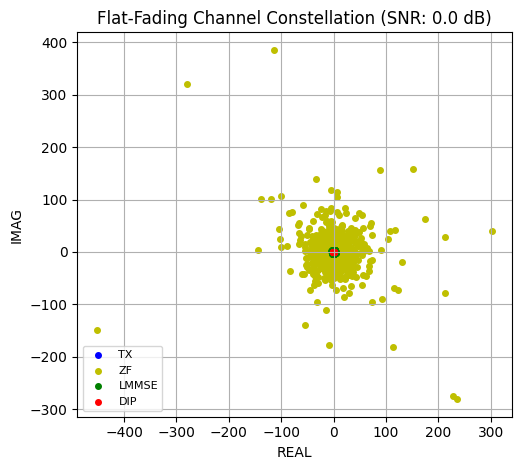

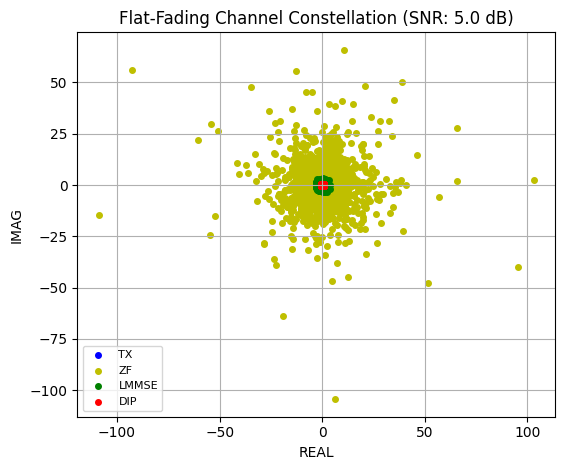

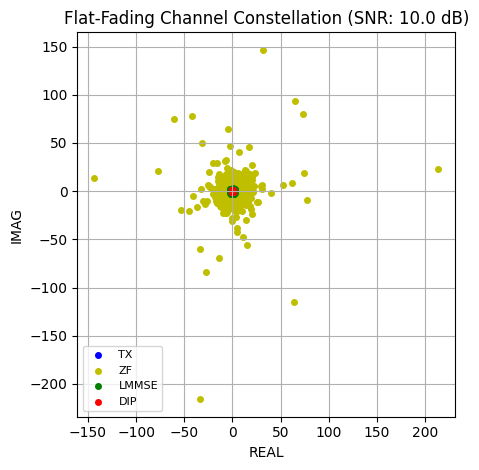

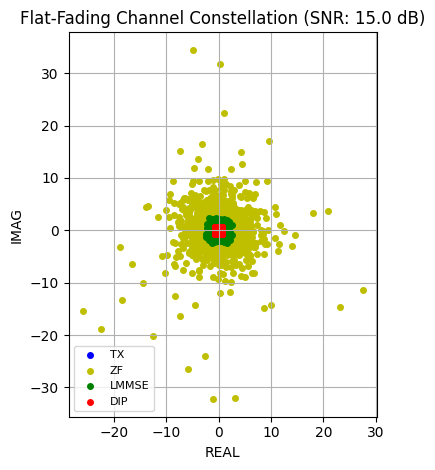

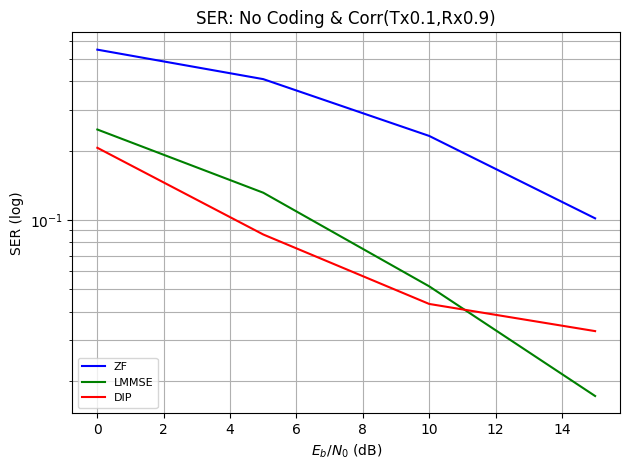

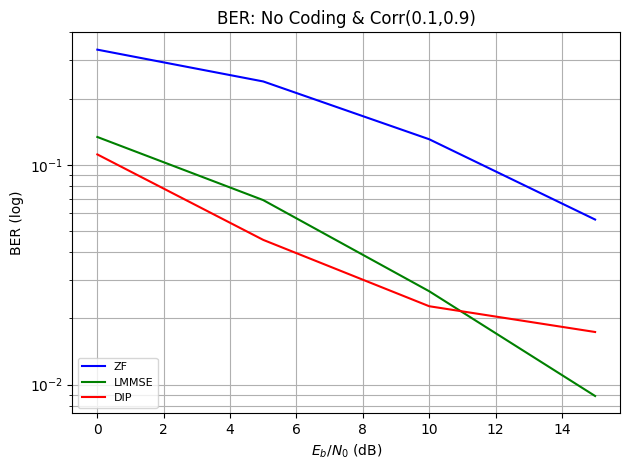

|                                                         TX_ANT_CORRELATION: 0.9 & RX_ANT_CORRELATION: 0.1                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  5.545e-01|  3.364e-01|           44087|     2.513e-01|     1.358e-01|              17802|   2.164e-01|   1.163e-01|            15243|      6.550e+02|
|---

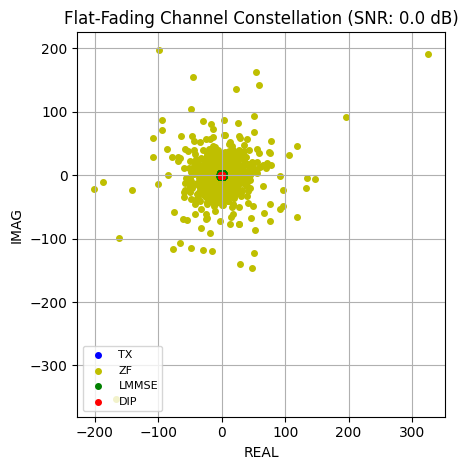

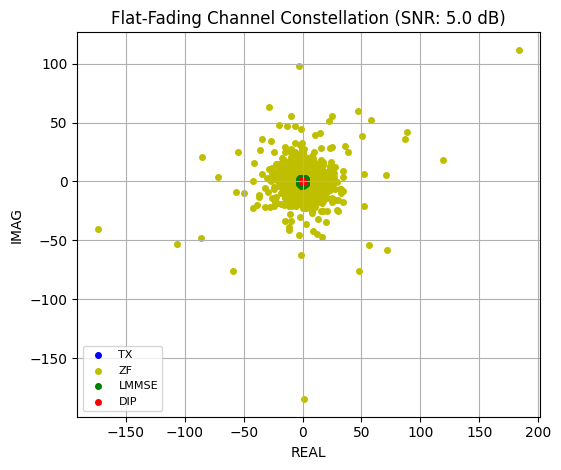

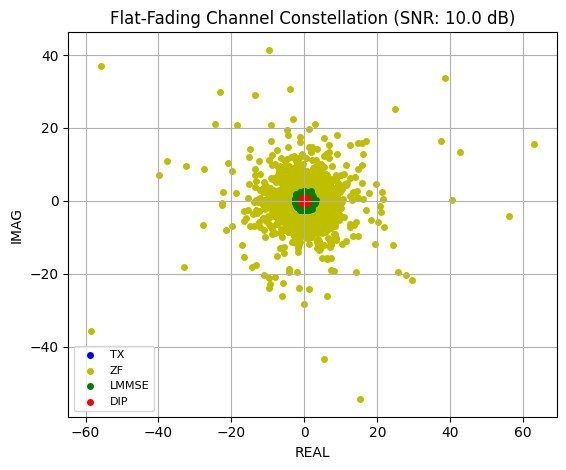

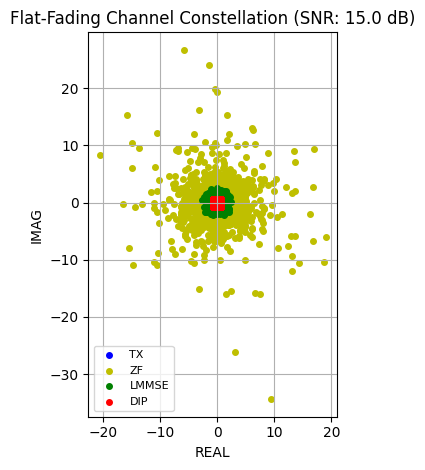

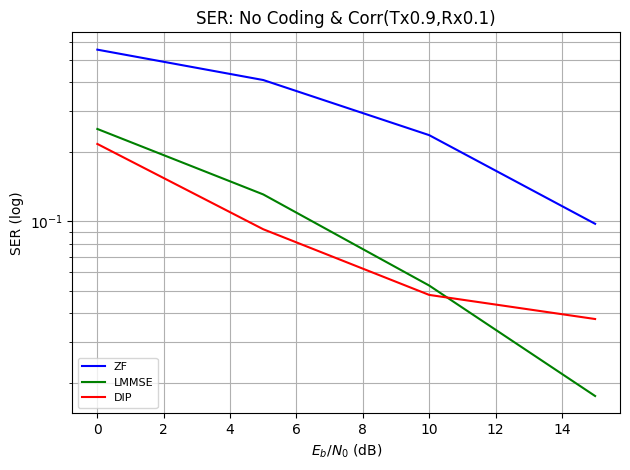

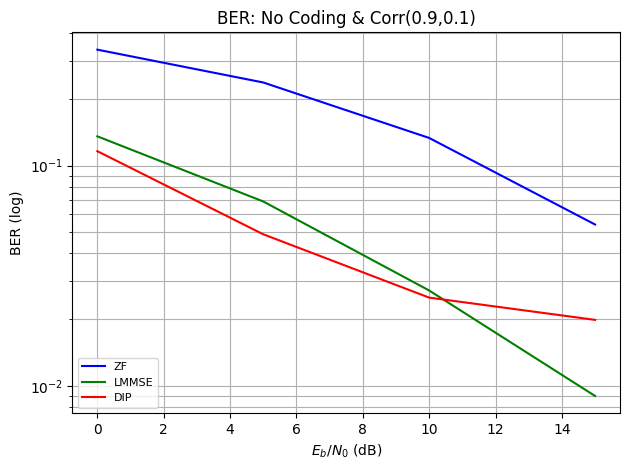

|                                                         TX_ANT_CORRELATION: 0.9 & RX_ANT_CORRELATION: 0.9                                                         |
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  6.840e-01|  4.386e-01|           57482|     3.998e-01|     2.267e-01|              29715|   4.072e-01|   2.317e-01|            30365|      6.569e+02|
|---

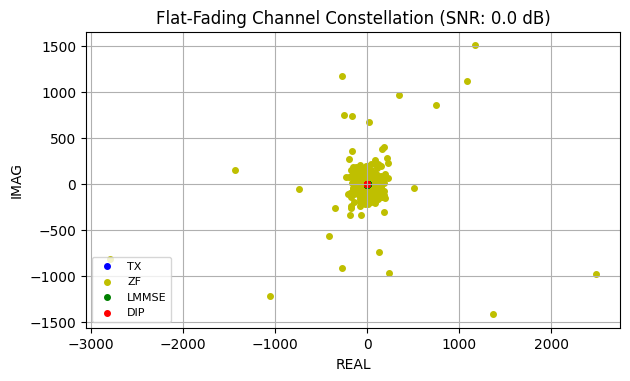

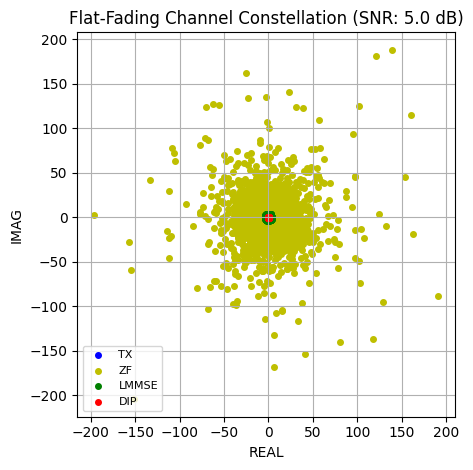

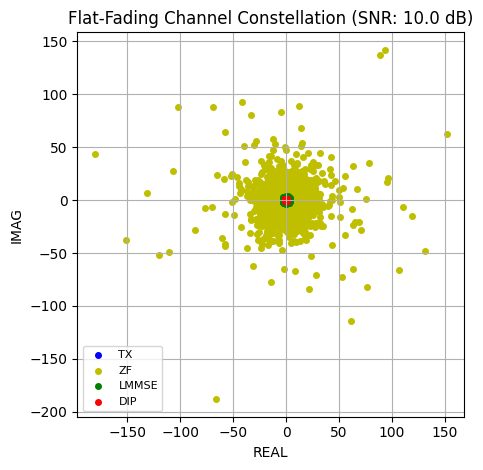

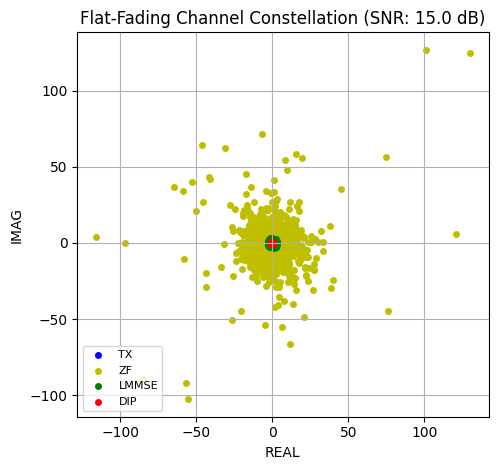

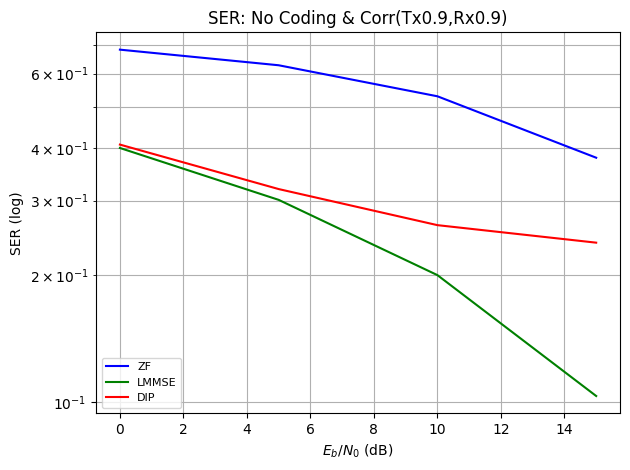

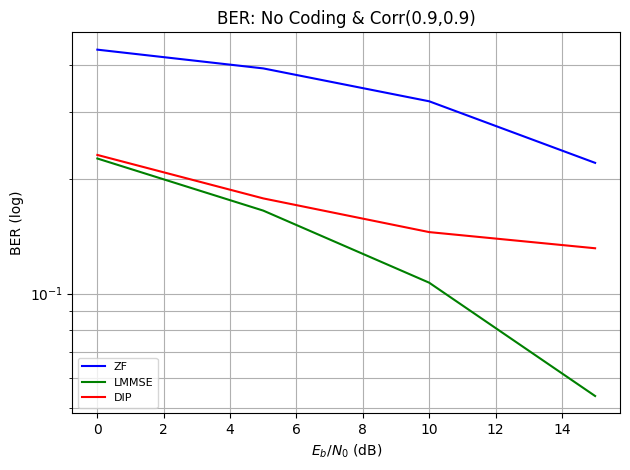

(array([ 0.,  5., 10., 15.]),
 array([[0.2653656 , 0.11752319, 0.04338074, 0.01483154],
        [0.54924011, 0.40895081, 0.23170471, 0.10160828],
        [0.55447388, 0.40945435, 0.23620605, 0.09751892],
        [0.68395996, 0.62806702, 0.53016663, 0.37905884]]),
 array([[0.06988525, 0.02334595, 0.00689697, 0.00218201],
        [0.24707031, 0.13128662, 0.0514679 , 0.0171814 ],
        [0.25126648, 0.13072205, 0.05265808, 0.01748657],
        [0.39976501, 0.30111694, 0.19963074, 0.10316467]]),
 array([[0.02052307, 0.00241089, 0.00056458, 0.0005188 ],
        [0.20576477, 0.08644104, 0.04315186, 0.03288269],
        [0.21636963, 0.09234619, 0.04795837, 0.03770447],
        [0.40724182, 0.31941223, 0.26228333, 0.23835754]]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeYCorr import ncodencorr

Block_Length = 512         # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas
CORRELATION_INDEX_MIN = 0.1     # Minimum Spatial Correlation
CORRELATION_INDEX_MAX = 0.9     # Maximum Spatial Correlation
CORRELATION_INDEX_POINTS = 2    # Correlation Points between Max and Min

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 32            # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0          # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 15.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 4        # EBNO Points

model_ncodencorr = ncodencorr(Block_Length, 
                                NUM_BITS_PER_SYMBOL,
                                CONSTELLATION_TYPE,
                                DEMAPPING_METHOD,
                                NUM_RX_ANT,
                                NUM_TX_ANT,
                                CORRELATION_INDEX_MIN,
                                CORRELATION_INDEX_MAX,
                                CORRELATION_INDEX_POINTS)

model_ncodencorr(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)